In [1]:
import numpy as np
import cv2
from skimage.io import imread
import pygast
import matplotlib.pyplot as plt
%matplotlib inline

255


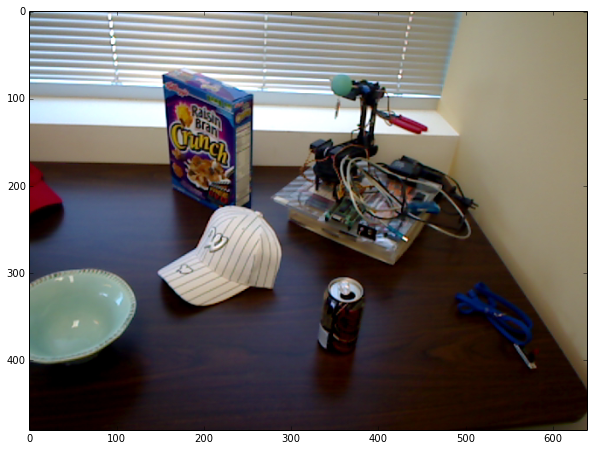

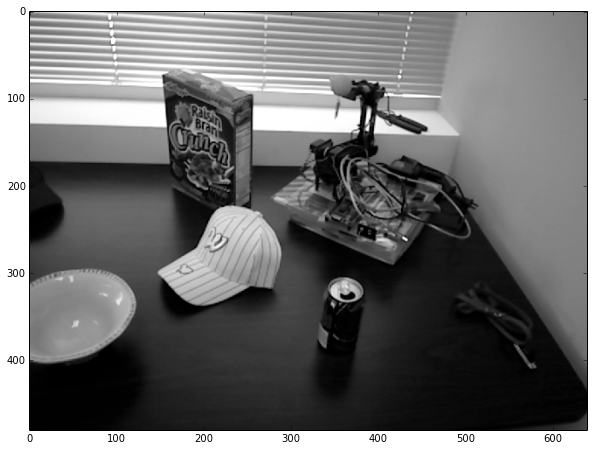

In [29]:
img = imread("/home/jlowens/Downloads/rgbd-scenes/table/table_1/table_1_20.png")
plt.figure(figsize=(10,10))
plt.imshow(img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gimg, cmap="gray")
print np.amax(gimg)

In [30]:
sym = pygast.Symmetry()

In [31]:
#gimg2 = cv2.resize(cv2.GaussianBlur(gimg), (320,240))
#gimg3 = cv2.resize(gimg, (160,120))
gimg2 = cv2.pyrDown(gimg, (320,240))
gimg3 = cv2.pyrDown(gimg2, (160,120))
gimg4 = cv2.pyrDown(gimg3, (80,60))

smag = np.zeros(gimg.shape, dtype=np.float32)
sdir = np.zeros(gimg.shape, dtype=np.float32)
smag2 = np.zeros(gimg2.shape, dtype=np.float32)
sdir2 = np.zeros(gimg2.shape, dtype=np.float32)
smag3 = np.zeros(gimg3.shape, dtype=np.float32)
sdir3 = np.zeros(gimg3.shape, dtype=np.float32)
smag4 = np.zeros(gimg4.shape, dtype=np.float32)
sdir4 = np.zeros(gimg4.shape, dtype=np.float32)

%time sym.transform(gimg4, smag4, sdir4, 7)
%time sym.transform(gimg3, smag3, sdir3, 7)
%time sym.transform(gimg2, smag2, sdir2, 7)
%time sym.transform(gimg, smag, sdir, 7)

CPU times: user 2.45 ms, sys: 4.19 ms, total: 6.64 ms
Wall time: 6.64 ms
CPU times: user 5.51 ms, sys: 0 ns, total: 5.51 ms
Wall time: 5.54 ms
CPU times: user 2.93 ms, sys: 15.9 ms, total: 18.8 ms
Wall time: 18.9 ms
CPU times: user 57.7 ms, sys: 12.1 ms, total: 69.9 ms
Wall time: 69.8 ms


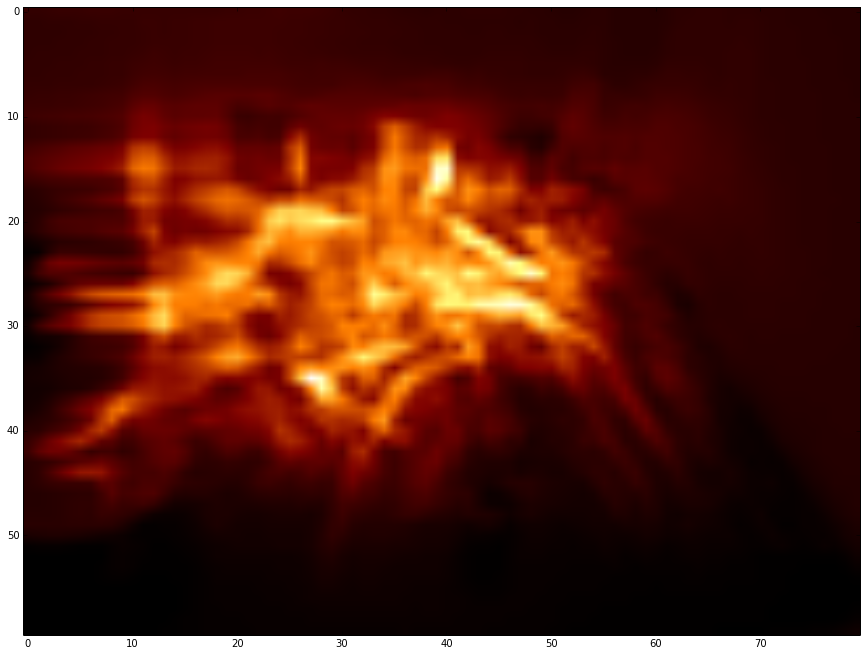

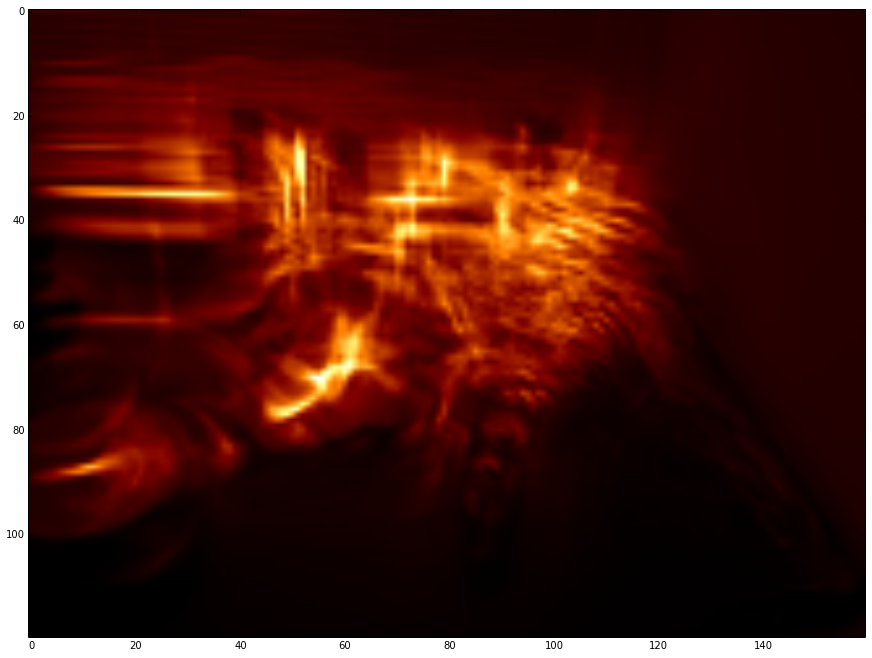

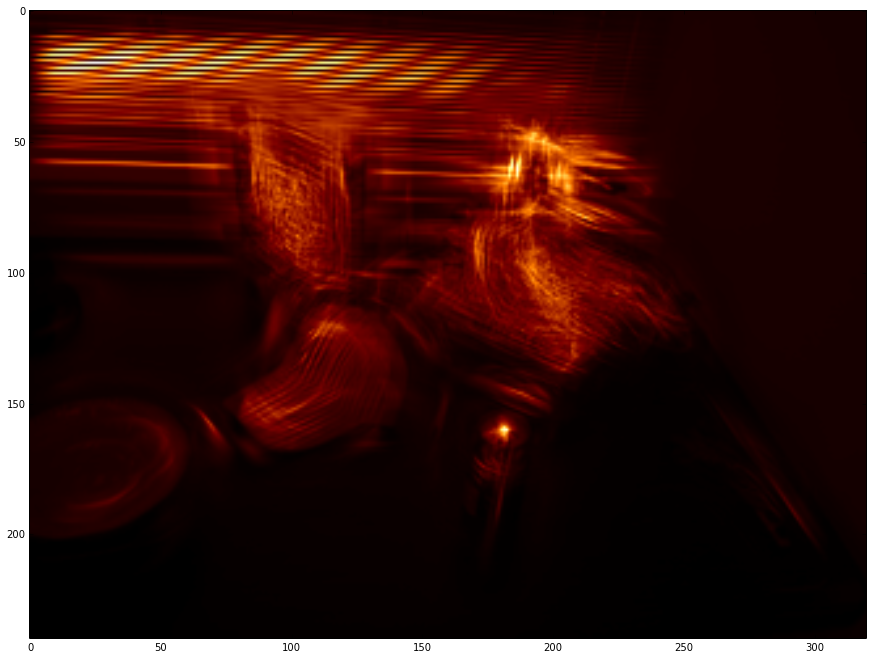

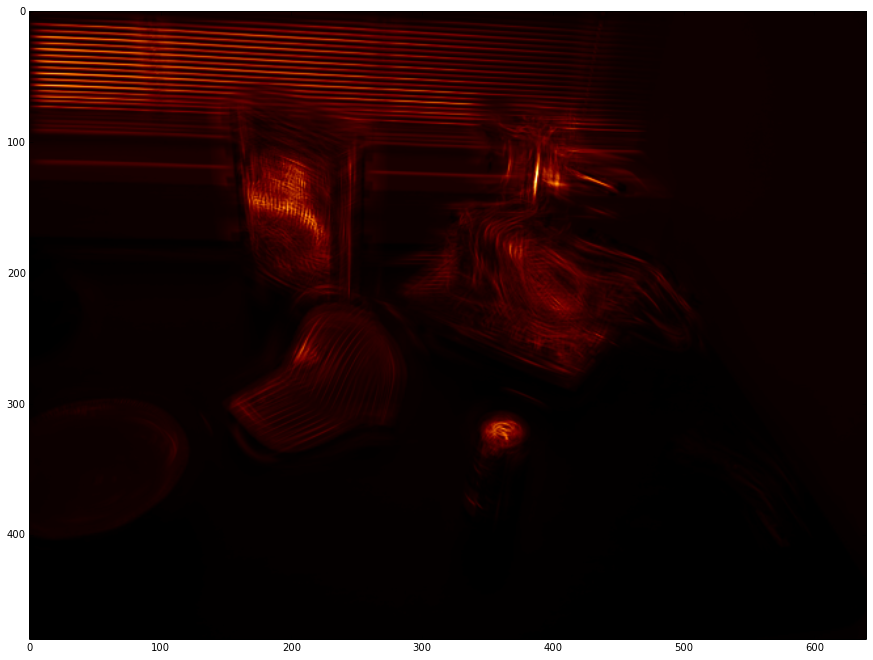

In [32]:
alpha = 0.03
beta = 1.0-alpha
gamma = 0.0
blend4 = cv2.addWeighted(gimg4.astype(np.float32)/255.0, alpha, smag4, beta, gamma)
blend3 = cv2.addWeighted(gimg3.astype(np.float32)/255.0, alpha, smag3, beta, gamma)
blend2 = cv2.addWeighted(gimg2.astype(np.float32)/255.0, alpha, smag2, beta, gamma)
blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, smag, beta, gamma)


plt.figure(figsize=(15,15))
plt.imshow(blend4, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend3, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend2, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend, cmap="afmhot")

In [ ]:
collected = cv2.pyrUp(smag4, (640,480)) 